In [6]:
import time
import timeit
import numpy as np

from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.benchmarks import simulations as sims

In [7]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [8]:
def mgc(X, Y):
    mgc = MGC(X, Y, None)
    # mgc_statistic, independence_test_metadata = mgc.test_statistic()
    p_value, metadata = mgc.p_value()  # p-value call has mgc.test_statistic() call
#     print("MGC stats from Python:")
#     print("MGC test statistic:", metadata["test_statistic"])
#     print("P Value:", p_value)
#     print("Optimal Scale:", metadata["optimal_scale"])

In [11]:
print("Linear data (varying num_samples)\n")
print("num_samples", "time_taken(in secs)")
num_samples_range = range(10, 151, 10)
linear_data = list()
for num_samples in num_samples_range:
    X, Y = sims.linear_sim(num_samp=num_samples, num_dim=1, noise=0.1)

#     start = time.time()
#     mgc(X, Y)
#     end = time.time()
#     time_taken = end - start
    mgc_w = wrapper(mgc, X, Y)
    time_taken = timeit.repeat(mgc_w, repeat=5, number=1) # best of 5 executions

    print(num_samples, time_taken)
    linear_data.append((num_samples, time_taken))
print()
print(linear_data)

Linear data (varying num_samples)

num_samples time_taken(in secs)
10 [1.49958706900361, 1.4638143540068995, 1.4030425519740675, 1.3368593089981005, 1.3159789350174833]
20 [3.2115682750009, 3.1250685720006004, 2.985335567005677, 2.9859190119896084, 2.9734666740114335]
30 [5.610436049988493, 5.6114496150112245, 5.622973475983599, 5.895857474999502, 5.7409448719990905]
40 [9.215580917021725, 9.190541190007934, 9.390753469022457, 9.245557349990122, 10.03561893699225]
50 [15.49718086401117, 14.153537111997139, 13.771135971997865, 13.558778512990102, 13.596087051002542]
60 [19.011020814010408, 19.007475175021682, 20.17377686299733, 20.04925867501879, 19.011196178005775]
70 [26.569766158994753, 25.17168415800552, 25.29060220599058, 25.5092632509768, 26.11904137901729]
80 [34.66687790400465, 32.48355589900166, 33.50255332799861, 33.05492725997465, 32.60379292801372]
90 [40.688592491991585, 40.77937115501845, 40.58879354299279, 40.54697668799781, 41.878742447996046]
100 [49.89725384998019, 49.

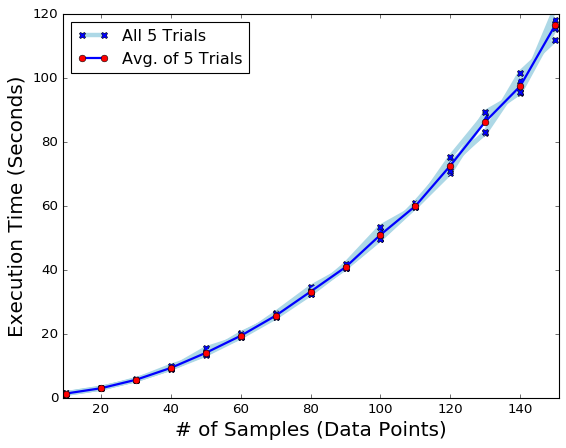

In [92]:
import matplotlib.pyplot as plt; plt.style.use('classic')
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
plt.rcParams["legend.loc"] = "best"
plt.rcParams['figure.facecolor'] = 'white'

fig, ax = plt.subplots() # create a new figure with a default 111 subplot
num_samples = range(10, 151, 10)
python_perf_times = [j for i, j in linear_data]
ax.plot(num_samples, np.array(python_perf_times)[:, 0], marker='X', markerfacecolor='blue', markersize=6, color='lightblue', linewidth=4, label="All 5 Trials")
ax.plot(num_samples, np.array(python_perf_times)[:, 1:], marker='X', markerfacecolor='blue', markersize=6, color='lightblue', linewidth=4)
ax.plot(num_samples, [np.mean(i) for i in python_perf_times], marker='o', markerfacecolor='red', markersize=6, color='blue', linewidth=2, label="Avg. of 5 Trials")

# axins = zoomed_inset_axes(ax, 1.5, loc=2) # zoom-factor: 2.5, location: upper-left
# axins.plot(num_samples, python_perf_times, marker='X', markerfacecolor='olive', markersize=4, color='lightblue', linewidth=5)
# axins.plot(num_samples, [np.mean(i) for i in python_perf_times], marker='X', markerfacecolor='red', markersize=6, color='blue', linewidth=5)
# axins.set_xlim(100, 150) # apply the x-limits
# axins.set_ylim(40, 120) # apply the y-limits

ax.set_xlabel('# of Samples (Data Points)', fontsize=18)
ax.set_xlim(9, 151)
ax.set_ylabel('Execution Time (Seconds)', fontsize=18)
ax.set_ylim(0, 120)
plt.legend()

In [6]:
# R code for benchmarking R MGC (r_performance.R)
# require("mgc")
# require("microbenchmark")

# print("Linear data (varying num_samples)")
# print("num_samples time_taken(in secs)")

# num_samples_range = seq(10, 150, by=10)
# linear_data <- list()
# i <- 1
# for (num_samples in num_samples_range){
#   data <- mgc.sims.linear(num_samples, 1, eps=0.1)

#   #start_time <- Sys.time()
#   #mgc.test(data$X, data$Y)
#   #end_time <- Sys.time()

#   #time_taken <- end_time - start_time
#   #time_taken <- as.numeric(time_taken, units = "secs")
#   times = seq(1, 5, by=1)
#   for (t in times){
#   time_taken <- microbenchmark(mgc.test(data$X, data$Y), times=1, unit="secs") # best of 5 executions
#   print(num_samples)
#   print(time_taken[1, 2]/(10^9))
#   linear_data <- c(linear_data, list("num_samples"=num_samples, "time_taken"=time_taken[1, 2]/(10^9)))
#   }
  
#   i <- i + 1
# }


# Performace Data (formatted)
#[(10, 1.179895), (10, 1.435764), (10, 1.392574), (10, 1.364731), (10, 1.244356), 
# (20, 3.626441), (20, 3.38207), (20, 3.435028), (20, 3.312011), (20, 3.472121), 
# (30, 6.725924), (30, 7.19072), (30, 6.850648), (30, 7.024207), (30, 6.970873), 
# (40, 11.60234), (40, 11.26915), (40, 11.36571), (40, 12.27015), (40, 12.33833), 
# (50, 19.56418), (50, 17.98312), (50, 17.36909), (50, 17.16499), (50, 18.17077), 
# (60, 25.21052), (60, 24.80274), (60, 24.37495), (60, 24.47379), (60, 25.59039), 
# (70, 33.09666), (70, 33.38766), (70, 32.52008), (70, 32.90658), (70, 33.6318), 
# (80, 41.91707), (80, 42.18968), (80, 42.25746), (80, 43.52817), (80, 42.34682), 
# (90, 54.26672), (90, 60.08258), (90, 52.39857), (90, 51.12012), (90, 52.91298), 
# (100, 66.36207), (100, 70.70109), (100, 64.84415), (100, 65.04437), (100, 63.17586), 
# (110, 76.69378), (110, 77.56344), (110, 79.68007), (110, 79.66596), (110, 82.81884), 
# (120, 97.89148), (120, 96.41177), (120, 99.12007), (120, 100.0838), (120, 100.4973), 
# (130, 119.39), (130, 117.1136), (130, 118.6135), (130, 117.5654), (130, 116.0784), 
# (140, 139.2461), (140, 136.9656), (140, 137.8895), (140, 136.6488), (140, 139.2114), 
# (150, 158.5903), (150, 156.5999), (150, 161.6194), (150, 160.23), (150, 161.1935)]

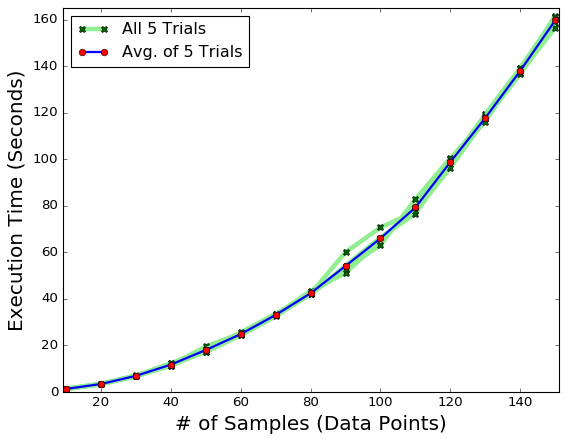

In [94]:
import matplotlib.pyplot as plt; plt.style.use('classic')
plt.rcParams["legend.loc"] = "best"
plt.rcParams['figure.facecolor'] = 'white'

num_samples = range(10, 151, 10)
r_perf_times = {10: [1.179895, 1.435764, 1.392574, 1.364731, 1.244356], 20: [3.626441, 3.38207, 3.435028, 3.312011, 3.472121], 30: [6.725924, 7.19072, 6.850648, 7.024207, 6.970873], 40: [11.60234, 11.26915, 11.36571, 12.27015, 12.33833], 50: [19.56418, 17.98312, 17.36909, 17.16499, 18.17077], 60: [25.21052, 24.80274, 24.37495, 24.47379, 25.59039], 70: [33.09666, 33.38766, 32.52008, 32.90658, 33.6318], 80: [41.91707, 42.18968, 42.25746, 43.52817, 42.34682], 90: [54.26672, 60.08258, 52.39857, 51.12012, 52.91298], 100: [66.36207, 70.70109, 64.84415, 65.04437, 63.17586], 110: [76.69378, 77.56344, 79.68007, 79.66596, 82.81884], 120: [97.89148, 96.41177, 99.12007, 100.0838, 100.4973], 130: [119.39, 117.1136, 118.6135, 117.5654, 116.0784], 140: [139.2461, 136.9656, 137.8895, 136.6488, 139.2114], 150: [158.5903, 156.5999, 161.6194, 160.23, 161.1935]}
plt.plot(num_samples, np.array([v for k, v in r_perf_times.items()])[:, 0], marker='X', markerfacecolor='darkgreen', markersize=6, color='lightgreen', linewidth=4, label="All 5 Trials")
plt.plot(num_samples, np.array([v for k, v in r_perf_times.items()])[:, 1:], marker='X', markerfacecolor='darkgreen', markersize=6, color='lightgreen', linewidth=4)
plt.plot(num_samples, [np.mean(v) for k, v in r_perf_times.items()], marker='o', markerfacecolor='red', markersize=6, color='blue', linewidth=2, label="Avg. of 5 Trials")
plt.xlabel('# of Samples (Data Points)', fontsize=18)
plt.xlim(9, 151)
plt.ylabel('Execution Time (Seconds)', fontsize=18)
plt.ylim(0, 165)
plt.legend()

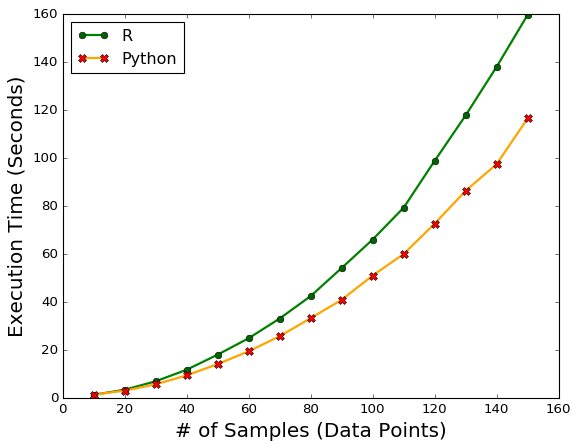

In [82]:
import matplotlib.pyplot as plt; plt.style.use('classic')
plt.rcParams["legend.loc"] = "best"
plt.rcParams['figure.facecolor'] = 'white'

num_samples = range(10, 151, 10)
r_perf_times = {10: [1.179895, 1.435764, 1.392574, 1.364731, 1.244356], 20: [3.626441, 3.38207, 3.435028, 3.312011, 3.472121], 30: [6.725924, 7.19072, 6.850648, 7.024207, 6.970873], 40: [11.60234, 11.26915, 11.36571, 12.27015, 12.33833], 50: [19.56418, 17.98312, 17.36909, 17.16499, 18.17077], 60: [25.21052, 24.80274, 24.37495, 24.47379, 25.59039], 70: [33.09666, 33.38766, 32.52008, 32.90658, 33.6318], 80: [41.91707, 42.18968, 42.25746, 43.52817, 42.34682], 90: [54.26672, 60.08258, 52.39857, 51.12012, 52.91298], 100: [66.36207, 70.70109, 64.84415, 65.04437, 63.17586], 110: [76.69378, 77.56344, 79.68007, 79.66596, 82.81884], 120: [97.89148, 96.41177, 99.12007, 100.0838, 100.4973], 130: [119.39, 117.1136, 118.6135, 117.5654, 116.0784], 140: [139.2461, 136.9656, 137.8895, 136.6488, 139.2114], 150: [158.5903, 156.5999, 161.6194, 160.23, 161.1935]}
# python_perf_times = [(10, [1.49958706900361, 1.4638143540068995, 1.4030425519740675, 1.3368593089981005, 1.3159789350174833]), (20, [3.2115682750009, 3.1250685720006004, 2.985335567005677, 2.9859190119896084, 2.9734666740114335]), (30, [5.610436049988493, 5.6114496150112245, 5.622973475983599, 5.895857474999502, 5.7409448719990905]), (40, [9.215580917021725, 9.190541190007934, 9.390753469022457, 9.245557349990122, 10.03561893699225]), (50, [15.49718086401117, 14.153537111997139, 13.771135971997865, 13.558778512990102, 13.596087051002542]), (60, [19.011020814010408, 19.007475175021682, 20.17377686299733, 20.04925867501879, 19.011196178005775]), (70, [26.569766158994753, 25.17168415800552, 25.29060220599058, 25.5092632509768, 26.11904137901729]), (80, [34.66687790400465, 32.48355589900166, 33.50255332799861, 33.05492725997465, 32.60379292801372]), (90, [40.688592491991585, 40.77937115501845, 40.58879354299279, 40.54697668799781, 41.878742447996046]), (100, [49.89725384998019, 49.83314521599095, 49.63331973500317, 52.141055349988164, 53.55299054601346]), (110, [61.061585283023305, 59.94531189699774, 59.702204303001054, 59.59889721899526, 59.678368475986645]), (120, [73.59825191399432, 72.8198820920079, 75.33874897297937, 70.41872229299042, 70.9401475340128]), (130, [82.78681519901147, 83.08883842398063, 88.68507358198985, 87.82382465302362, 89.34507059599855]), (140, [98.98420377401635, 101.70177302500815, 95.44383225901402, 95.491604343988, 95.61231937698903]), (150, [115.22319458299899, 111.85267155797919, 115.49483873700956, 118.16604766299133, 121.73665377899306])]

plt.plot(num_samples, [np.mean(v) for k, v in r_perf_times.items()], marker='o', markerfacecolor='darkgreen', markersize=6, color='green', linewidth=2, label="R")
plt.plot(num_samples, [np.mean(i) for i in python_perf_times], marker='X', markerfacecolor='red', markersize=8, color='orange', linewidth=2, label="Python")
plt.xlabel('# of Samples (Data Points)', fontsize=18)
plt.ylabel('Execution Time (Seconds)', fontsize=18)
plt.legend()

In [27]:
print("Linear data (varying num_dimensions)\n")
num_dims_range = range(100, 1001, 100)
linear_data_dims = list()
for num_dims in num_dims_range:
    X, Y = sims.linear_sim(num_samp=10, num_dim=num_dims, noise=0.1)

#     start = time.time()
#     mgc(X, Y)
#     end = time.time()
#     time_taken = end - start

    mgc_w = wrapper(mgc, X, Y)
    time_taken = min(timeit.repeat(mgc_w, repeat=5, number=1)) # best of 5 executions

    print("nums_dims:", num_dims, "time_taken (in secs):", time_taken)
    linear_data_dims.append((num_dims, time_taken))
print()
print(linear_data_dims)

Linear data (varying num_dimensions)

nums_dims: 100 time_taken (in secs): 1.6322504569980083
nums_dims: 200 time_taken (in secs): 1.7605915010062745
nums_dims: 300 time_taken (in secs): 1.777208691011765
nums_dims: 400 time_taken (in secs): 1.7736779630067758
nums_dims: 500 time_taken (in secs): 1.8358760929986602
nums_dims: 600 time_taken (in secs): 1.8216123840102227
nums_dims: 700 time_taken (in secs): 2.0647538140037796
nums_dims: 800 time_taken (in secs): 1.9504206029960187
nums_dims: 900 time_taken (in secs): 1.9636282050050795
nums_dims: 1000 time_taken (in secs): 1.9531981680047465

[(100, 1.6322504569980083), (200, 1.7605915010062745), (300, 1.777208691011765), (400, 1.7736779630067758), (500, 1.8358760929986602), (600, 1.8216123840102227), (700, 2.0647538140037796), (800, 1.9504206029960187), (900, 1.9636282050050795), (1000, 1.9531981680047465)]


In [25]:
print("Non-linear (spiral) data (varying num_samples)")
num_samples_range = range(10, 101, 10)
spiral_data = list()
for num_samples in num_samples_range:
    X, Y = sims.spiral_sim(num_samp=num_samples, num_dim=1, noise=0.1)

#     start = time.time()
#     mgc(X, Y)
#     end = time.time()
#     time_taken = end - start
    mgc_w = wrapper(mgc, X, Y)
    time_taken = min(timeit.repeat(mgc_w, repeat=5, number=1)) # best of 5 executions

    print("nums_dims:", num_samples, "time_taken (in secs):", time_taken)
    spiral_data.append((num_samples, time_taken))
print()
print(spiral_data)

Non-linear (spiral) data (varying num_samples)
nums_dims: 10 time_taken (in secs): 1.5979939620010555
nums_dims: 20 time_taken (in secs): 3.9707941100059543
nums_dims: 30 time_taken (in secs): 7.937399971997365
nums_dims: 40 time_taken (in secs): 13.300695457000984
nums_dims: 50 time_taken (in secs): 19.093872940997244
nums_dims: 60 time_taken (in secs): 26.14037140799337
nums_dims: 70 time_taken (in secs): 34.971699265995994
nums_dims: 80 time_taken (in secs): 45.653762695001205
nums_dims: 90 time_taken (in secs): 61.09912801900646
nums_dims: 100 time_taken (in secs): 70.50048310800048

[(10, 1.5979939620010555), (20, 3.9707941100059543), (30, 7.937399971997365), (40, 13.300695457000984), (50, 19.093872940997244), (60, 26.14037140799337), (70, 34.971699265995994), (80, 45.653762695001205), (90, 61.09912801900646), (100, 70.50048310800048)]
